## Final Portfolio Project

This is a project launched at Codecademy and it is a part of Data Scientist Career Path. More information [here](https://www.codecademy.com/learn/paths/data-science)

### Introduction

This is a final portfolio project from `Codecademy`. In this project there was no database provided by Codecademy platform. The goal is to use  different sources to find a database and work on it. I decided to chose `Kaggle` and I found a datebase - **Forest Cover Type Prediction.** 

The data for this project can be loaded [here](https://www.kaggle.com/c/forest-cover-type-prediction/data)

### About Database

According to information found on Kaggle:

The study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. Each observation is a 30m x 30m patch. You are asked to predict an integer classification for the forest cover type. The seven types are:

- 1 - Spruce/Fir
- 2 - Lodgepole Pine
- 3 - Ponderosa Pine
- 4 - Cottonwood/Willow
- 5 - Aspen
- 6 - Douglas-fir
- 7 - Krummholz

The training set (15120 observations) contains both features and the Cover_Type. The test set contains only the features. You must predict the Cover_Type for every row in the test set (565892 observations).

### Project Scope

It's beneficial to create a project scope whenever a new project is being started. Below are four sections to help guide the project process and progress. The first section is the project goals, a section to define the high-level objectives and set the intentions for this project. The next section is the data, which needs to be checked if project goals can be met with the available data. Thirdly, the analysis will have to be thought through, which include the methods and aligning the question(s) with the project goals. Lastly, evaluation will help build conclusions and findings from the analysis.

#### Goals

In this project the goals is to take data from Kaggle, explore the dataset, preprocess attributes, make and compare various multi-class models.

#### Data

Data provided from Kaggle. There are two csv file: 
- `'train.csv'` - training set (15120 observations) contains both features and the Cover_Type
- `'test.csv'` - test set contains only the features

#### Analysis

I will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. I will also use algorithms of machine learning models.

#### Evaulation

This section contains final conclusion and next steps which can be implemented. 

### Data Analysis

#### Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

#### Load the Data

To analyze the data, load the datasets into 2 DataFrames **train** and **test**.

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

#### Data Check

In [3]:
print(train.shape)
print(test.shape)

(15120, 56)
(565892, 55)


In [4]:
train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


The dataframe `train` contains 15120 rows and 56 columns. The last one column Cover_Type is the response variable that will be classified.

### Exploratory Data Analysis 

#### Summary Statistics 

In [5]:
train.describe()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.00000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,7560.50000,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,4364.91237,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1.00000,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,3780.75000,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7560.50000,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,11340.25000,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,15120.00000,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [6]:
train.dtypes

Id                                    int64
Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                      

#### Missing Values

In [7]:
train.isna().sum()

Id                                    0
Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0


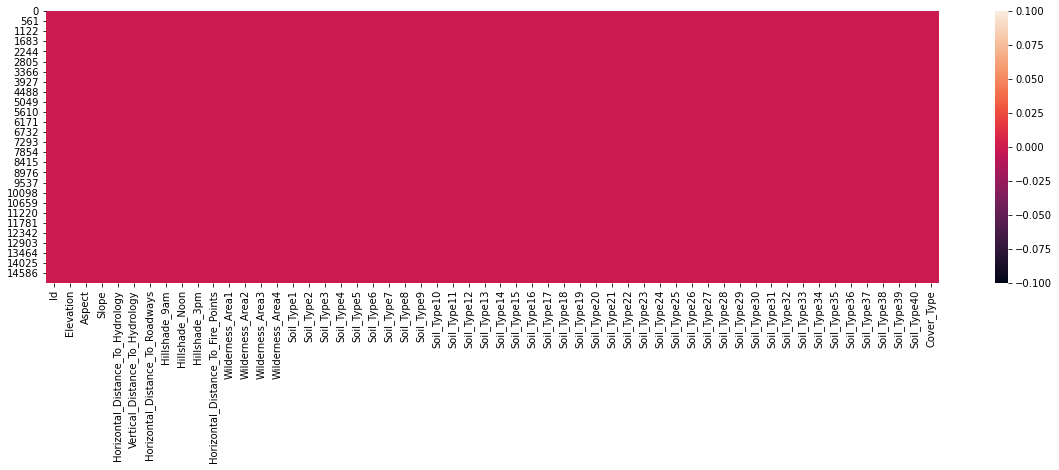

In [8]:
plt.figure(figsize=(20,5))
sns.heatmap(train.isna())
plt.show()

As we can see on the heatmap above there is no missing value in our dataframe `train`. 

#### All Numerical Variables

In [9]:
numerical_features = [feature for feature in train.columns if train[feature].dtype!='O' and 'Soil' not in feature and 'Wilderness' not in feature]

# All are numerical variables
print(numerical_features) 
print(len(numerical_features))
print(train.shape)

['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Cover_Type']
12
(15120, 56)


#### Relationship between numerical_features and Cover_Type

In [10]:
# remove column ID
train.drop('Id', axis=1, inplace=True)
numerical_features = numerical_features[1:]

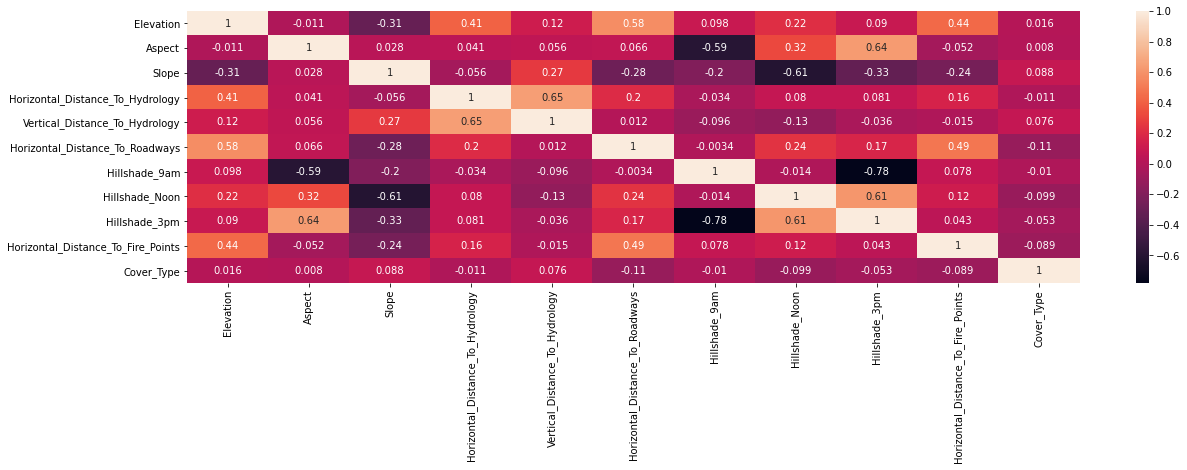

In [11]:
plt.figure(figsize=(20,5))
sns.heatmap(train[numerical_features].corr(), annot=True)
plt.show()

The heatmap above shows us the correlations between all numerical variables extracted and Cover_Type column. 

#### Correlation between high correlated variables

In [12]:
# Correlation tells relation between two attributes.
# Correlation requires continous data. Hence, ignore Wilderness_Area and Soil_Type as they are binary

#sets the number of features considered
size = 12

#create a dataframe with only 'size' features
data=train.iloc[:,:size] 

#get the names of all the columns
cols=data.columns 

# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only only highly correlated attributes
threshold = 0.5

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))
    
# Strong correlation is observed between the following pairs

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


#### Scatter plots for high correlated variables

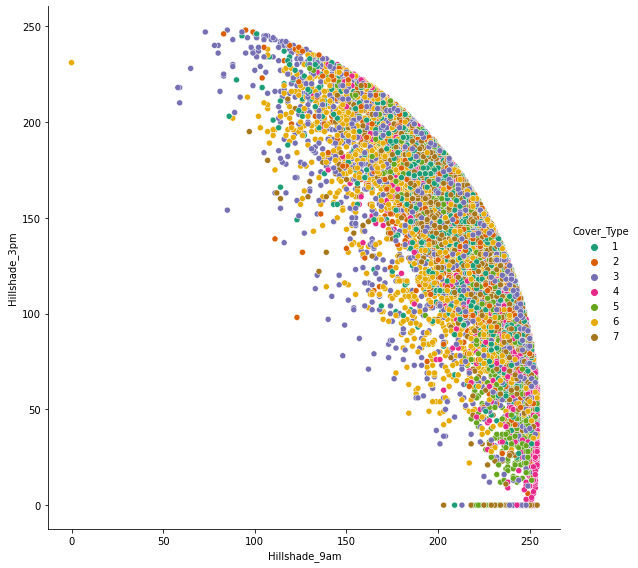

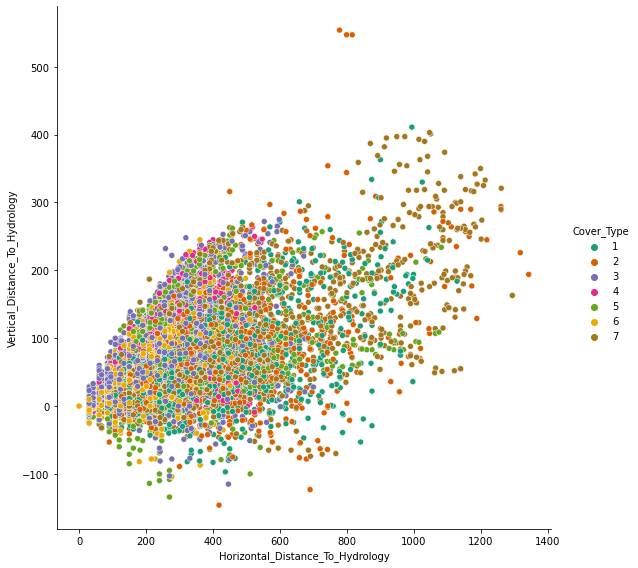

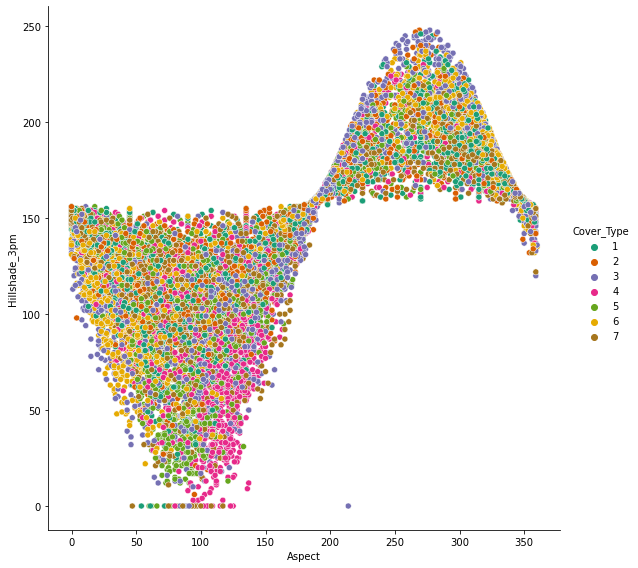

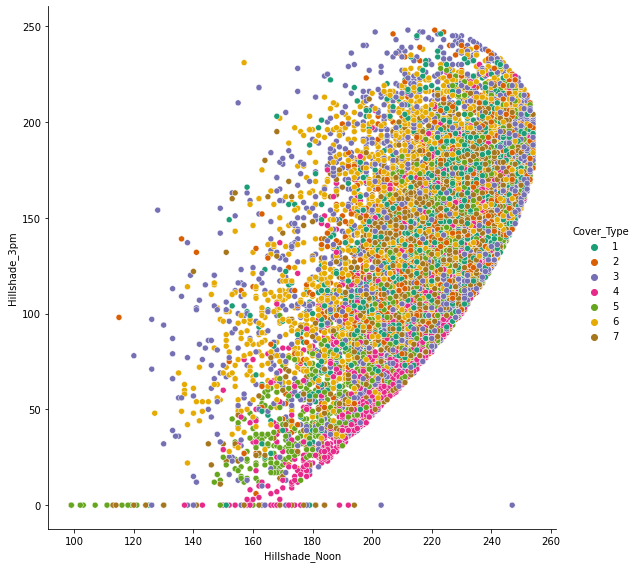

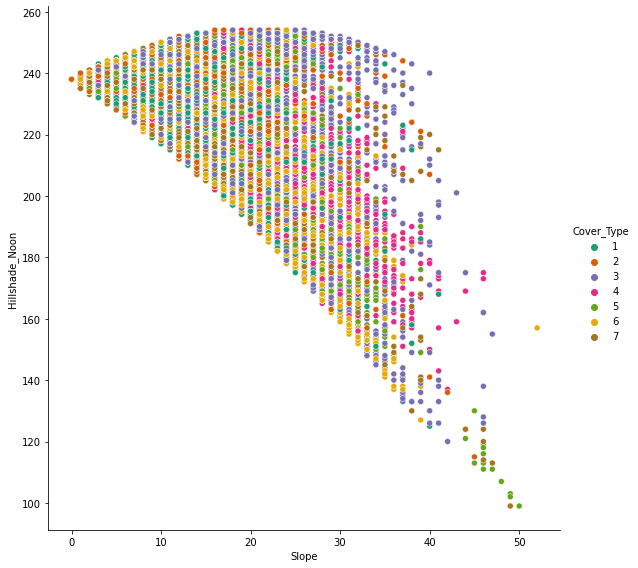

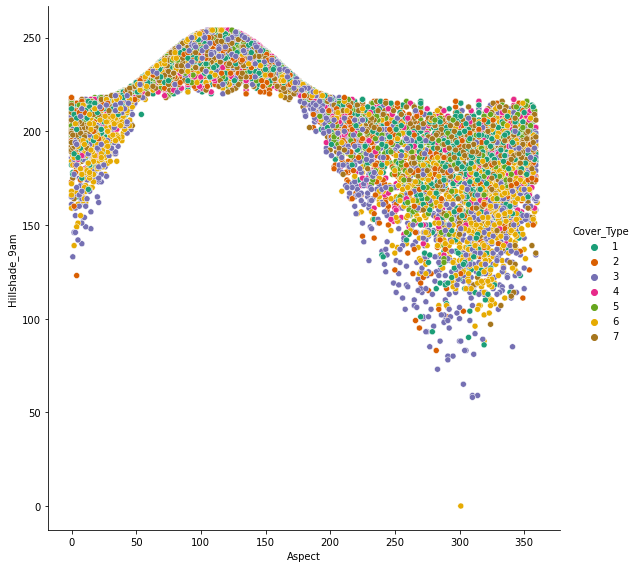

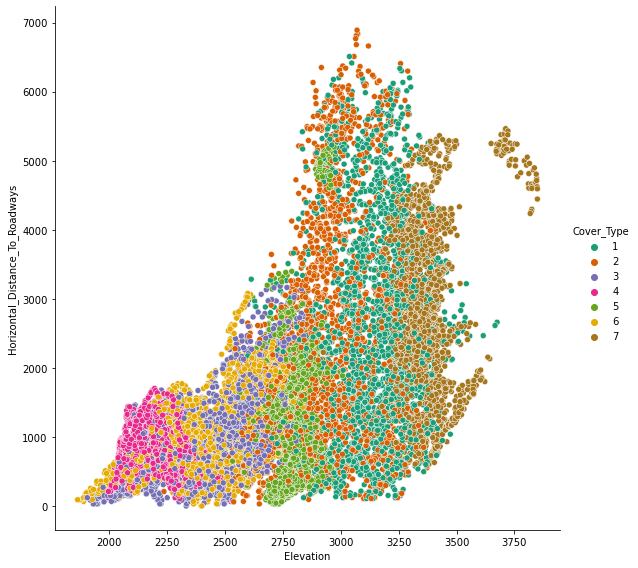

In [13]:
for v,i,j in s_corr_list:
    sns.pairplot(train, hue="Cover_Type", size=8, x_vars=cols[i], y_vars=cols[j], palette='Dark2')
    plt.show()

#### Distribution of numerical_features

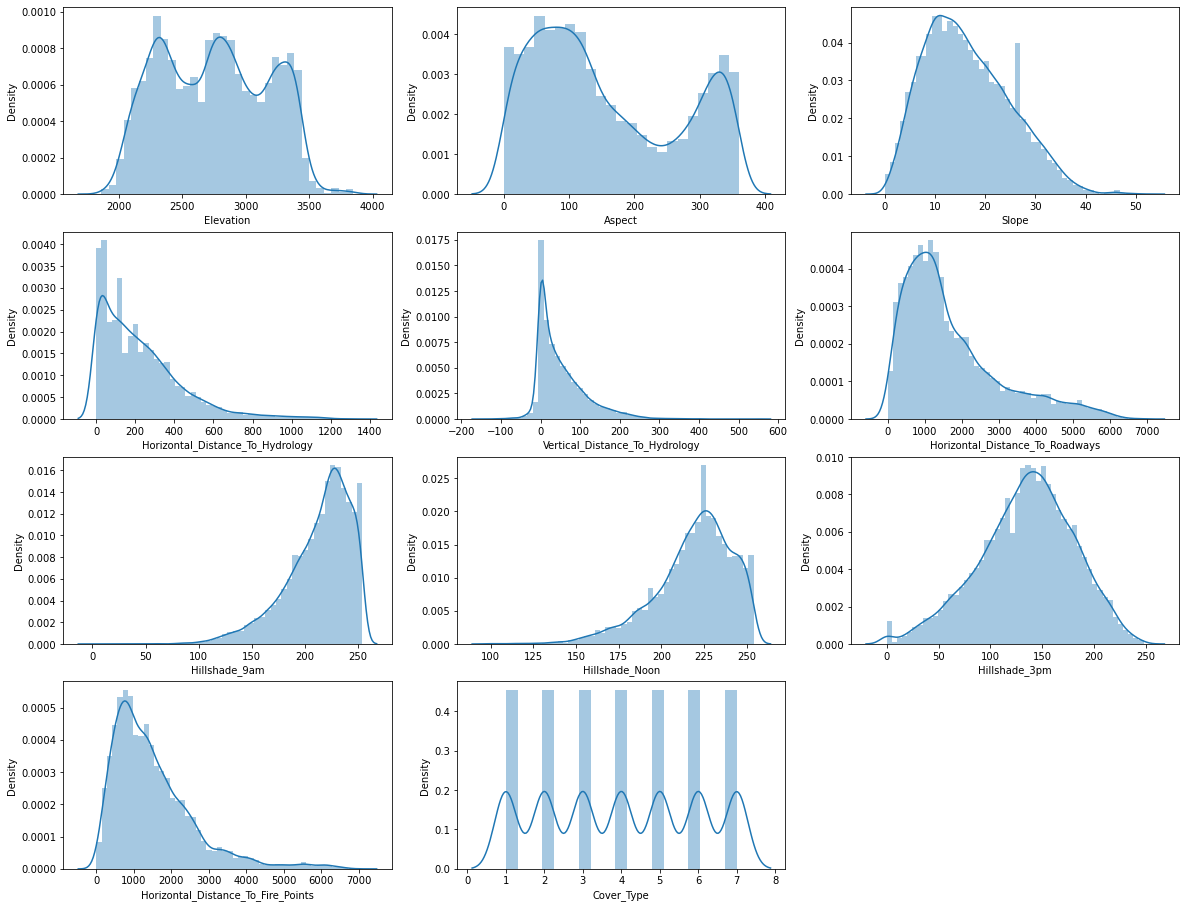

In [14]:
i=0
plt.figure(figsize=(20,20))
for feature in numerical_features:
    i+=1
    plt.subplot(5, 3, i)
    sns.distplot(train[feature])
plt.show()

In [15]:
train[numerical_features].skew()

Elevation                             0.075640
Aspect                                0.450935
Slope                                 0.523658
Horizontal_Distance_To_Hydrology      1.488052
Vertical_Distance_To_Hydrology        1.537776
Horizontal_Distance_To_Roadways       1.247811
Hillshade_9am                        -1.093681
Hillshade_Noon                       -0.953232
Hillshade_3pm                        -0.340827
Horizontal_Distance_To_Fire_Points    1.617099
Cover_Type                            0.000000
dtype: float64

#### Violin plots for all variables

Once I have a distribution and skew of numerical_features it would be beneficial to show this variables using violin plots. There are more powerful than the histogram or the box plot because it shows distributions and facets the data by another variable (in this case Cover_Type) to show more dimensions of the data.

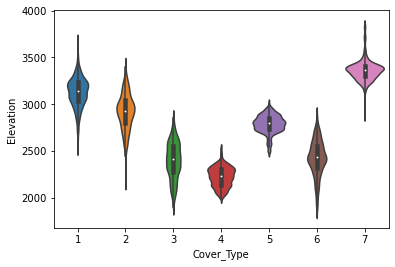

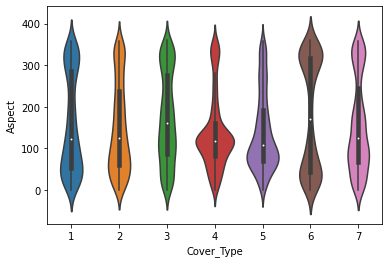

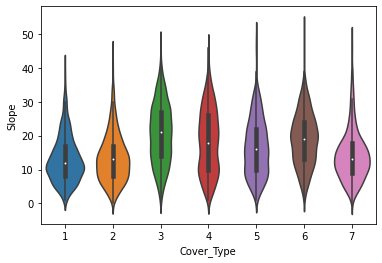

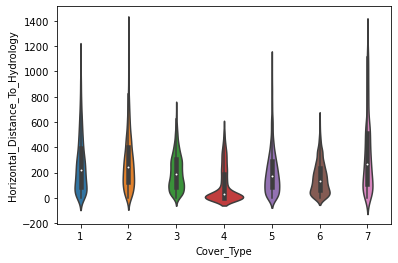

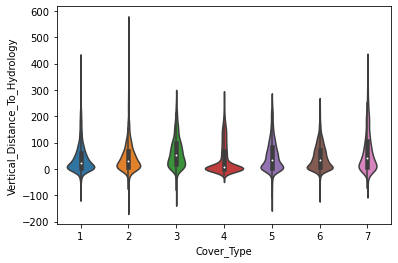

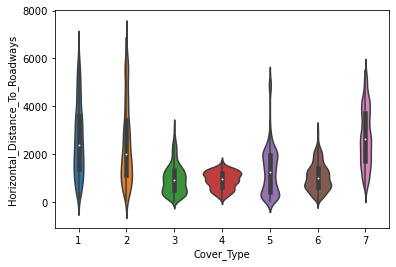

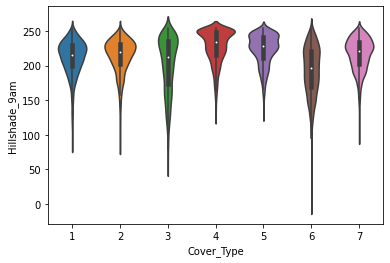

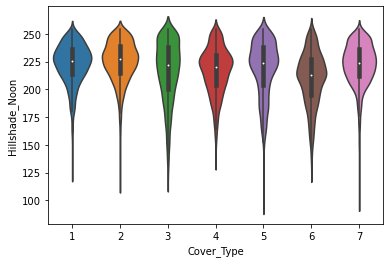

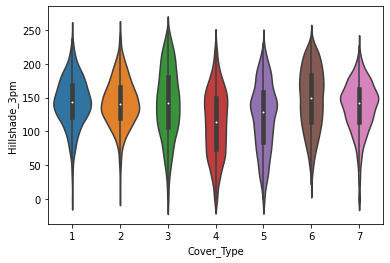

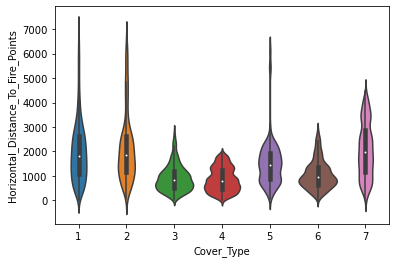

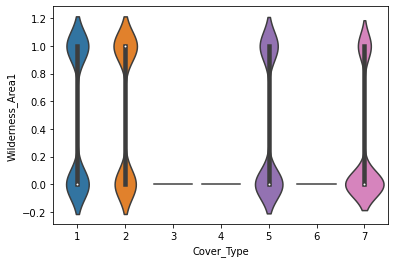

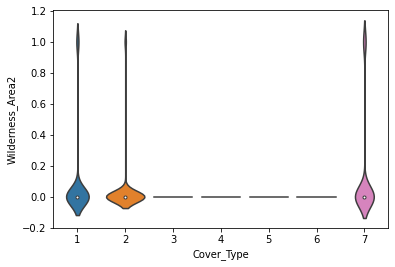

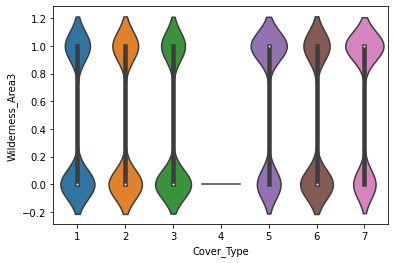

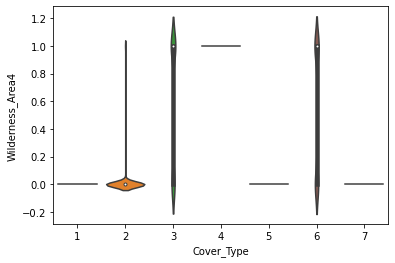

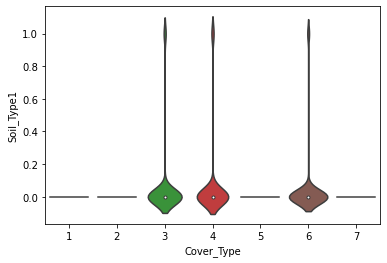

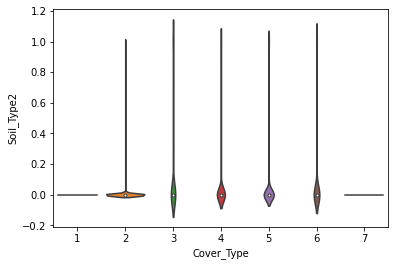

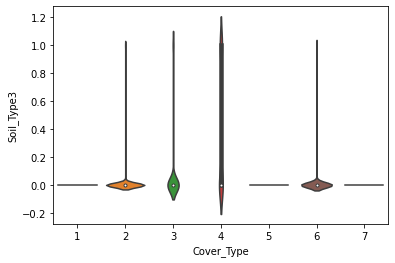

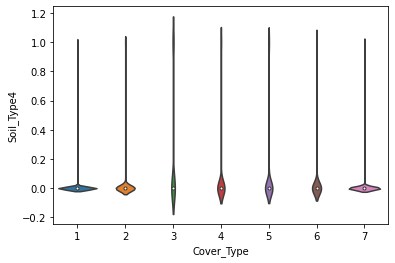

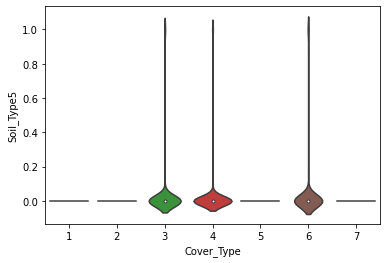

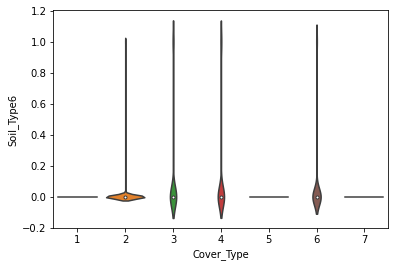

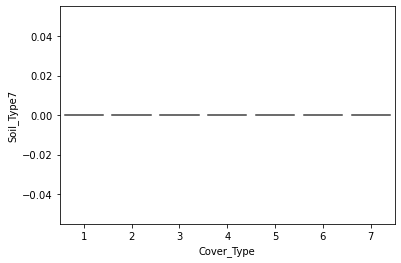

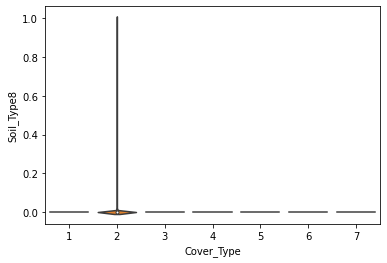

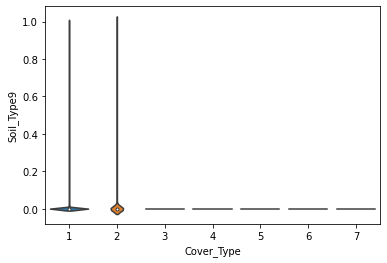

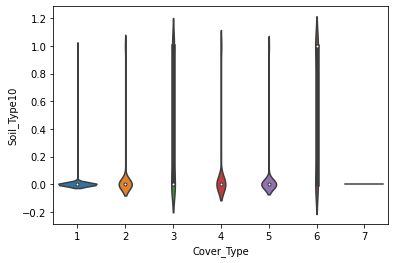

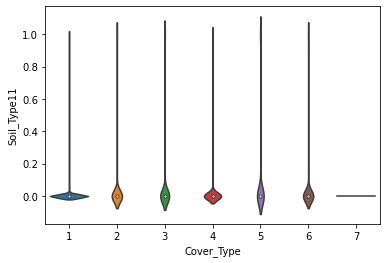

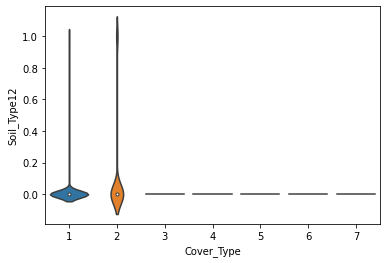

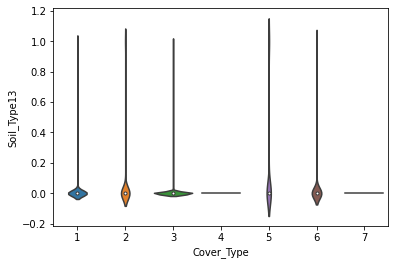

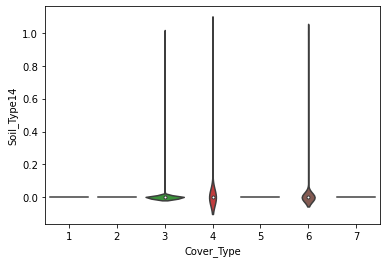

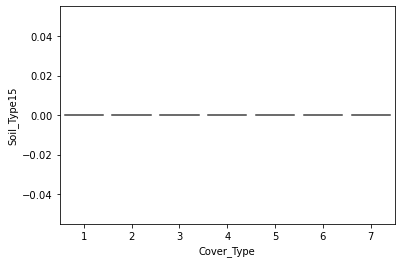

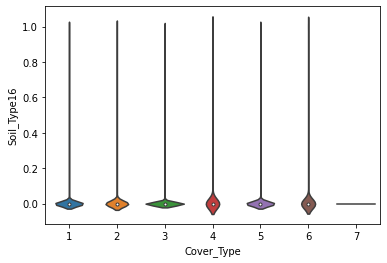

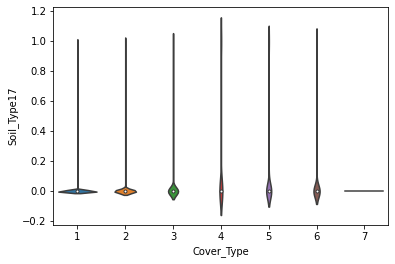

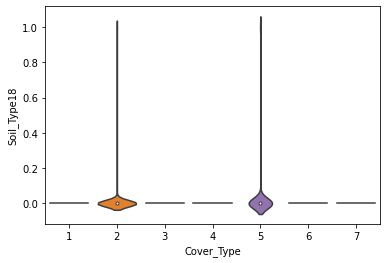

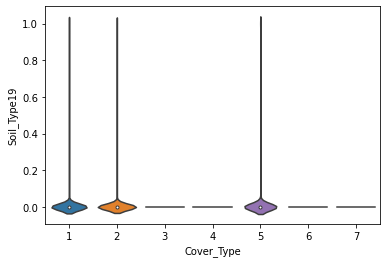

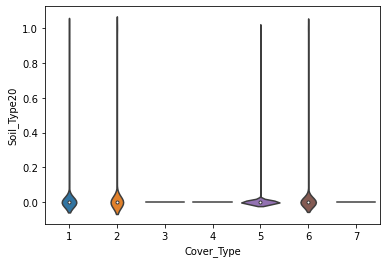

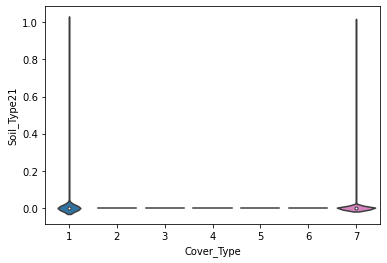

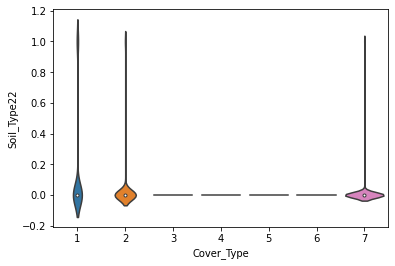

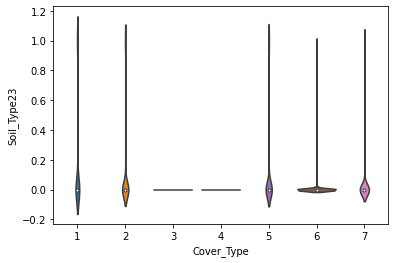

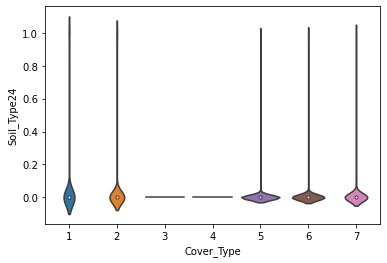

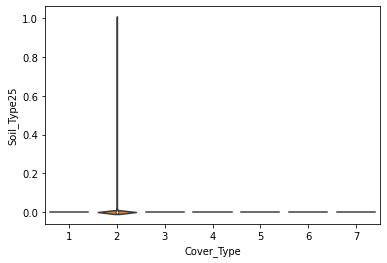

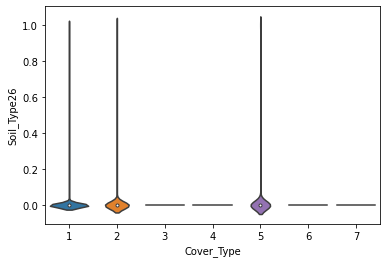

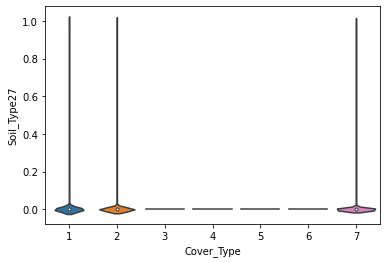

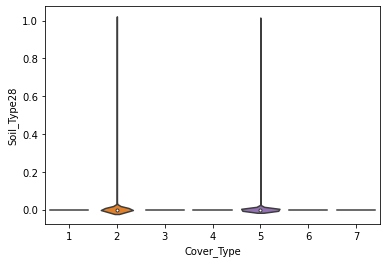

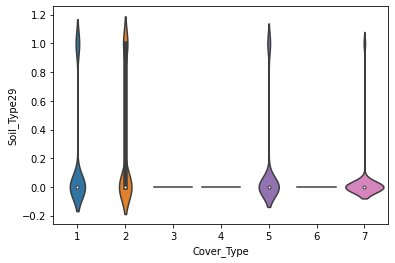

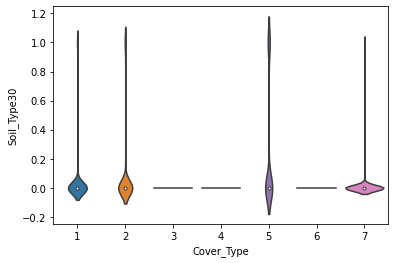

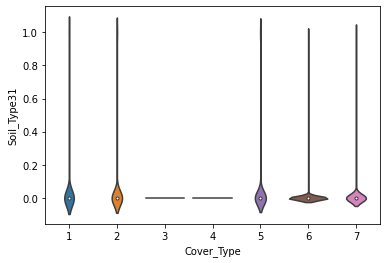

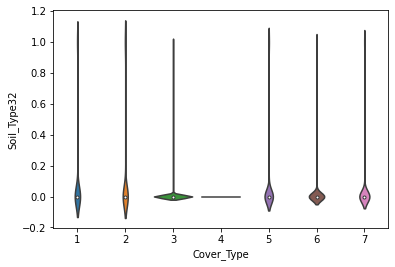

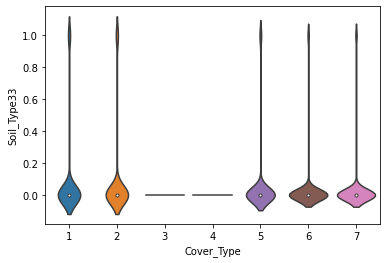

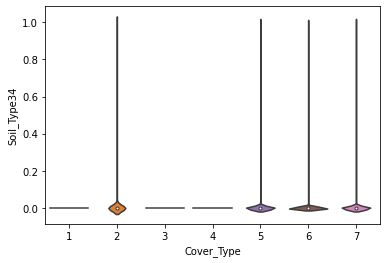

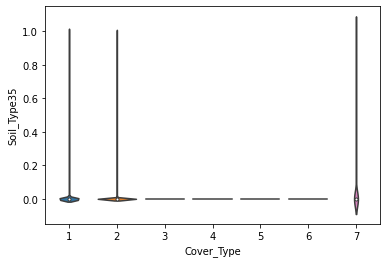

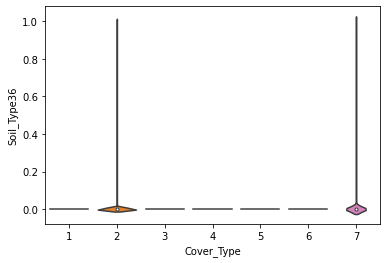

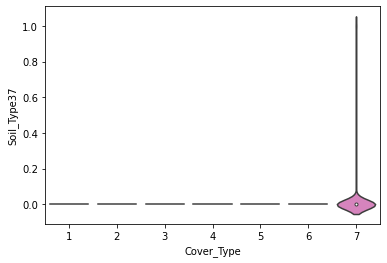

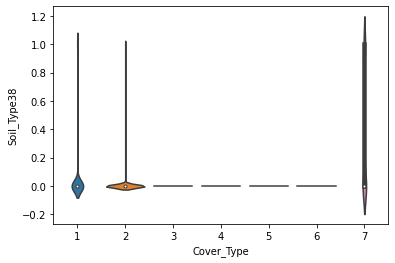

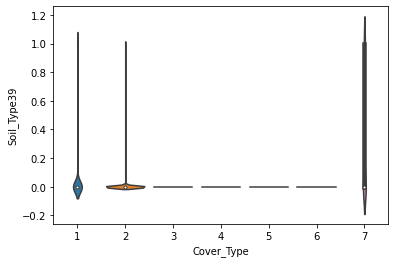

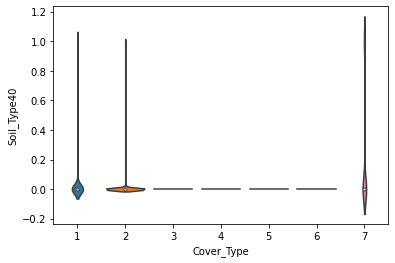

In [16]:
# get columns from train['numerical_features']
cols = train.columns

# number of attributes (exclude target)
size = len(cols)-1

# x-axis has target attribute to distinguish between classes
x = cols[size]

# y-axis shows values of an attribute
y = cols[0:size]

#Plot violin for all attributes
for i in range(0,size):
    sns.violinplot(data=train, x=x, y=y[i])  
    plt.show()      

#### Wilderness_Area and Soil_Type

In [17]:
#names of all the columns
cols = train.columns

#number of rows=r , number of columns=c
r,c = train.shape

#Create a new dataframe with r rows, one column for each encoded category, and target in the end
data = pd.DataFrame(index=np.arange(0, r),columns=['Wilderness_Area', 'Soil_Type', 'Cover_Type'])

#Make an entry in 'data' for each r as category_id, target value
for i in range(0,r):
    w=0;
    s=0;
    # Category1 Wilderness_Area range
    for j in range(10,14):
        if (train.iloc[i,j] == 1):
            w=j-9  #category class
            break
    # Category2 Soil_Type range        
    for k in range(14,54):
        if (train.iloc[i,k] == 1):
            s=k-13 #category class
            break
    #Make an entry in 'data' for each r as category_id, target value        
    data.iloc[i]=[w, s, train.iloc[i,c-1]]

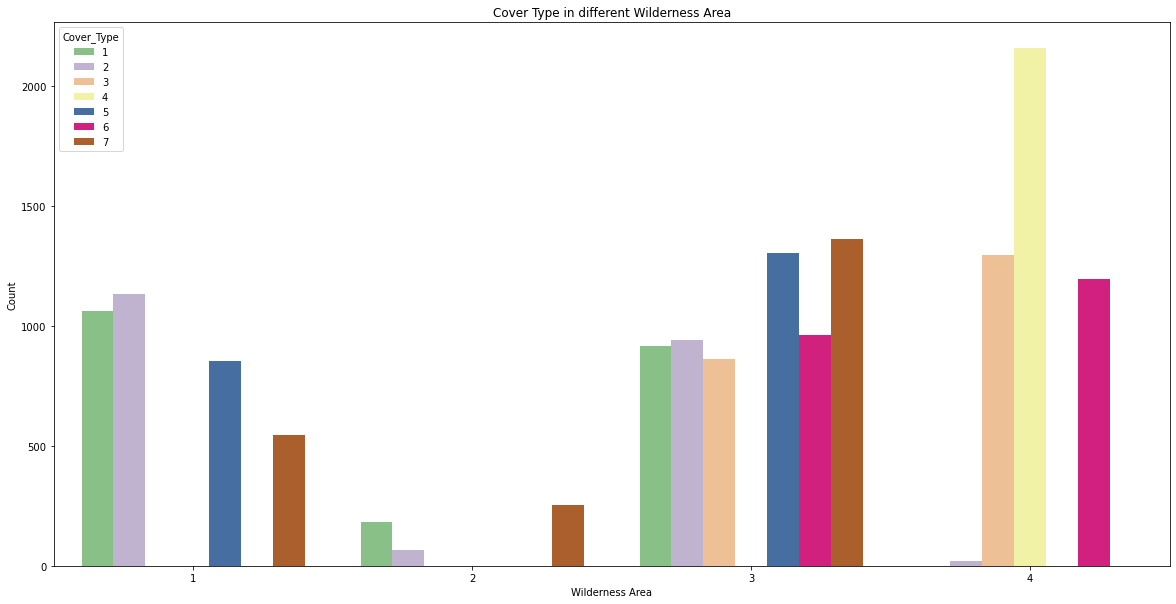

In [18]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='Wilderness_Area', hue='Cover_Type', palette='Accent')
plt.xlabel('Wilderness Area')
plt.ylabel('Count')
plt.title('Cover Type in different Wilderness Area', )
plt.show()

The wilderness areas are:

- 1: Rawah Wilderness Area
- 2: Neota Wilderness Area
- 3: Comanche Peak Wilderness Area
- 4: Cache la Poudre Wilderness Area

The wilderness wrea 4 has a lot of number 4 cover_type which is a very good type of cover and its appear only in this area. Least diversified is area number 2. 

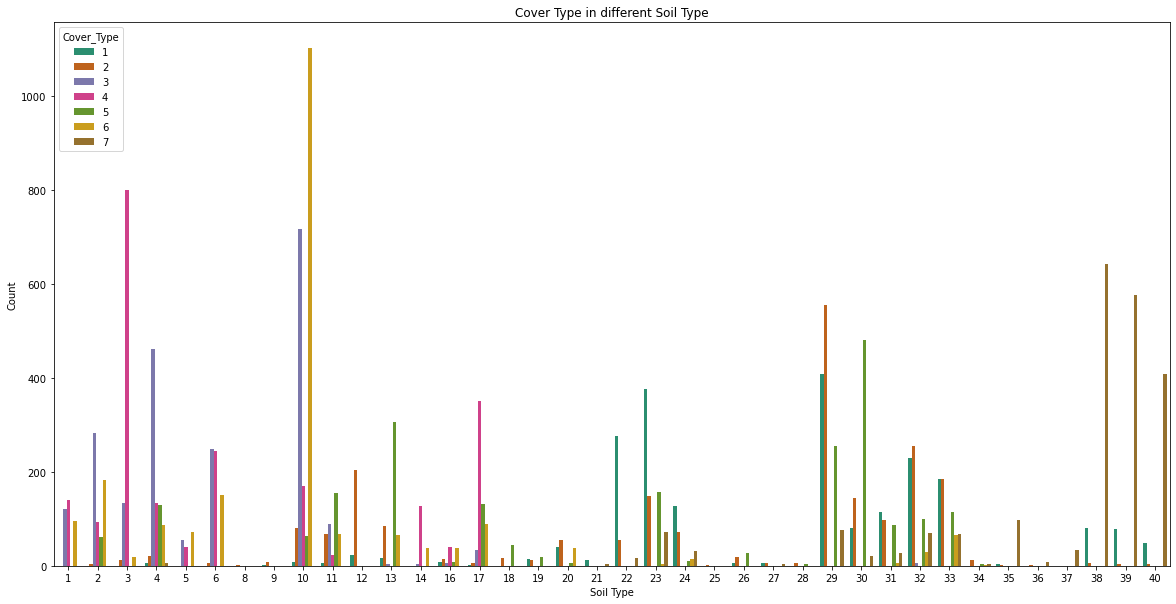

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(data=data, x='Soil_Type', hue='Cover_Type', palette='Dark2')
plt.xlabel('Soil Type')
plt.ylabel('Count')
plt.title('Cover Type in different Soil Type')
plt.show()

The soil types are:

- 1 Cathedral family - Rock outcrop complex, extremely stony.
- 2 Vanet - Ratake families complex, very stony.
- 3 Haploborolis - Rock outcrop complex, rubbly.
- 4 Ratake family - Rock outcrop complex, rubbly.
- 5 Vanet family - Rock outcrop complex complex, rubbly.
- 6 Vanet - Wetmore families - Rock outcrop complex, stony.
- 7 Gothic family.
- 8 Supervisor - Limber families complex.
- 9 Troutville family, very stony.
- 10 Bullwark - Catamount families - Rock outcrop complex, rubbly.
- 11 Bullwark - Catamount families - Rock land complex, rubbly.
- 12 Legault family - Rock land complex, stony.
- 13 Catamount family - Rock land - Bullwark family complex, rubbly.
- 14 Pachic Argiborolis - Aquolis complex.
- 15 unspecified in the USFS Soil and ELU Survey.
- 16 Cryaquolis - Cryoborolis complex.
- 17 Gateview family - Cryaquolis complex.
- 18 Rogert family, very stony.
- 19 Typic Cryaquolis - Borohemists complex.
- 20 Typic Cryaquepts - Typic Cryaquolls complex.
- 21 Typic Cryaquolls - Leighcan family, till substratum complex.
- 22 Leighcan family, till substratum, extremely bouldery.
- 23 Leighcan family, till substratum - Typic Cryaquolls complex.
- 24 Leighcan family, extremely stony.
- 25 Leighcan family, warm, extremely stony.
- 26 Granile - Catamount families complex, very stony.
- 27 Leighcan family, warm - Rock outcrop complex, extremely stony.
- 28 Leighcan family - Rock outcrop complex, extremely stony.
- 29 Como - Legault families complex, extremely stony.
- 30 Como family - Rock land - Legault family complex, extremely stony.
- 31 Leighcan - Catamount families complex, extremely stony.
- 32 Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
- 33 Leighcan - Catamount families - Rock outcrop complex, extremely stony.
- 34 Cryorthents - Rock land complex, extremely stony.
- 35 Cryumbrepts - Rock outcrop - Cryaquepts complex.
- 36 Bross family - Rock land - Cryumbrepts complex, extremely stony.
- 37 Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
- 38 Leighcan - Moran families - Cryaquolls complex, extremely stony.
- 39 Moran family - Cryorthents - Leighcan family complex, extremely stony.
- 40 Moran family - Cryorthents - Rock land complex, extremely stony.

Soil Type `1-6`, `10-14`, `17`, `22-23`, `29-33`, `35`, `38-40` offer lot of class distinction as counts for some are very high. 

#### Label inbalance

An imbalance in the prediction label needs to be checked. This is important since it's a multi-class problem where two or more outcomes can be had. An imbalance in a response variable is bad since it means that some labels only occur a few times. This is an issue for machine learning algorithms if there are not enough data to train with which will give bad predictions.

In [20]:
train.groupby(['Cover_Type']).size()

Cover_Type
1    2160
2    2160
3    2160
4    2160
5    2160
6    2160
7    2160
dtype: int64

In the dataset, I observed that the counts of all `Cover_Type` are equal. Hence, I do not have to worry about imbalances and trying to address this problem.

### Data Preperation 

#### Remove unnecessary columns

First, the columns with standard deviation of 0 will be dropped. Removing unnecessary columns reduces complexity.

In [21]:
# columns with std = 0    
rem = []
for c in train.columns:
    if train[c].std() == 0: #standard deviation is zero
        rem.append(c)

# drop the columns 
train.drop(rem, axis=1,inplace=True)

print(rem)

['Soil_Type7', 'Soil_Type15']


#### Splitting data into training and test sets

In [22]:
col_length = len(train.columns)

#Y is the target column, X has the rest

x = train.iloc[:, 0:col_length-1]
y = train.iloc[:, col_length-1:col_length]

In [23]:
#Validation chunk size
val_size = 0.2

#Use a common seed in all experiments so that same chunk is used for validation
seed = 0

#Split the data into chunks

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=val_size, random_state=seed)

All the categorical variables in the input dataset are in numerical form. Hence, one does not need to think about encoding them to numerical values.

#### Standardization

Normalizing the dataset with the `StandardScaler`, `MinMaxScaler`, `Normalizer`. It's often a good idea to normalize data. A common way to do so is by standardization. Standardization will set the mean to 0 with a unit standard deviation (standard deviation equal to 1).

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [25]:
#All features
x_all = []

#Additionally we will make a list of subsets
x_all_add =[]

#columns to be dropped
rem = []

#indexes of columns to be dropped
i_rem = []

#List of combinations
comb = []
comb.append("All+1.0")

#Add this version of X to the list 
x_all.append(['Orig','All', x_train, x_test, 1.0, cols[:col_length-1]])

#point where categorical data begins
size=10

In [26]:
# Standardized

#Apply transform only for non-categorical data
x_temp = StandardScaler().fit_transform(x_train.iloc[:,0:size])
x_val_temp = StandardScaler().fit_transform(x_test.iloc[:,0:size])

#Concatenate non-categorical data and categorical
x_con = np.concatenate((x_temp, x_train.iloc[:,size:]), axis=1)
x_val_con = np.concatenate((x_val_temp, x_test.iloc[:,size:]), axis=1)

#Add this version of X to the list 
x_all.append(['StdSca','All', x_con, x_val_con, 1.0, cols[:col_length-1]])

In [27]:
# MinMaxScaler

#Apply transform only for non-categorical data
x_temp = MinMaxScaler().fit_transform(x_train.iloc[:,0:size])
x_val_temp = MinMaxScaler().fit_transform(x_test.iloc[:,0:size])

#Concatenate non-categorical data and categorical
x_con = np.concatenate((x_temp, x_train.iloc[:,size:]), axis=1)
x_val_con = np.concatenate((x_val_temp, x_test.iloc[:,size:]), axis=1)

#Add this version of X to the list 
x_all.append(['MinMax','All', x_con, x_val_con, 1.0, cols[:col_length-1]])

In [28]:
# Normalizer

#Apply transform only for non-categorical data
x_temp = Normalizer().fit_transform(x_train.iloc[:,0:size])
x_val_temp = Normalizer().fit_transform(x_test.iloc[:,0:size])

#Concatenate non-categorical data and categorical
x_con = np.concatenate((x_temp, x_train.iloc[:,size:]), axis=1)
x_val_con = np.concatenate((x_val_temp, x_test.iloc[:,size:]), axis=1)

#Add this version of X to the list 
x_all.append(['Norm','All', x_con, x_val_con, 1.0, cols[:col_length-1]])

### Predictions

#### Model Building

Now to create some models. Here is a list of [Multi class models](https://scikit-learn.org/stable/modules/multiclass.html) available in scikit learn. This solution use all of them, but just 7 of them for now.

 - Logistic Regression Model
 - Decision Tree Classifier
 - Linear Discriminant Analysis
 - K Neighbors Classifier
 - Linear Support Vector Machine
 - Gradient Boosting Classifier
 - Gaussian Naive Bayes

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

The next step is to load all of the models.

In [30]:
logistic_regression = LogisticRegression()
linear_discriminant_analysis = LinearDiscriminantAnalysis()
k_neighbors_classifier = KNeighborsClassifier()
decision_tree_classifier = DecisionTreeClassifier()
linear_SVC = LinearSVC()
gradient_boosting_classifier = GradientBoostingClassifier()
gaussian_naive_bayes = GaussianNB()

#### Evaluation Metrics

In [31]:
from sklearn.metrics import classification_report
from sklearn import model_selection, metrics

In [32]:
def fit_ml_algo(algo, x_train, y_train, cv):
    
    model = algo.fit(x_train,y_train)
    
    acc = round(model.score(x_train, y_train)*100, 2)
    
    train_pred = model_selection.cross_val_predict(algo, x_train, y_train, cv=cv, n_jobs=-1)
    
    acc_cv = round(metrics.accuracy_score(y_train, train_pred)*100, 2)
    
    return(train_pred, acc, acc_cv)

#### Logistic Regression

In [33]:
train_pred_log_reg, acc_log_reg, acc_cv_log_reg =  fit_ml_algo(logistic_regression, x_train, y_train, 10)

print("Accuracy Logistic Regression Model: "+str(acc_log_reg))

print("Accuracy cross_validation 10-Fold: "+str(acc_cv_log_reg))

Accuracy Logistic Regression Model: 48.57
Accuracy cross_validation 10-Fold: 48.07


#### Decision Tree Classifier

In [34]:
train_pred_dtc, acc_dtc, acc_cv_dtc =  fit_ml_algo(decision_tree_classifier, x_train, y_train, 10)

print("Accuracy Decision Tree Classifier Model: "+str(acc_dtc))

print("Accuracy cross_validation 10-Fold: "+str(acc_cv_dtc))

Accuracy Decision Tree Classifier Model: 100.0
Accuracy cross_validation 10-Fold: 78.18


#### Linear Discriminant Analysis

In [35]:
train_pred_lda, acc_lda, acc_cv_lda =  fit_ml_algo(linear_discriminant_analysis, x_train, y_train, 10)

print("Accuracy Linear Discriminant Analysis Model: "+str(acc_lda))

print("Accuracy cross_validation 10-Fold: "+str(acc_cv_lda))

Accuracy Linear Discriminant Analysis Model: 65.01
Accuracy cross_validation 10-Fold: 64.47


#### K Neighbors Classifier

In [36]:
train_pred_knc, acc_knc, acc_cv_knc =  fit_ml_algo(k_neighbors_classifier, x_train, y_train, 10)

print("Accuracy K Neighbors Classifier Model: "+str(acc_knc))

print("Accuracy cross_validation 10-Fold: "+str(acc_cv_knc))

Accuracy K Neighbors Classifier Model: 87.6
Accuracy cross_validation 10-Fold: 79.49


#### Linear Support Vector Machine

In [37]:
train_pred_lsvm, acc_lsvm, acc_cv_lsvm =  fit_ml_algo(linear_SVC, x_train, y_train, 10)

print("Accuracy Linear Support Vector Machine Model: "+str(acc_lsvm))

print("Accuracy cross_validation 10-Fold: "+str(acc_cv_lsvm))

Accuracy Linear Support Vector Machine Model: 36.17
Accuracy cross_validation 10-Fold: 32.12


#### Gradient Boosting Classifier

In [38]:
train_pred_gbc, acc_gbc, acc_cv_gbc =  fit_ml_algo(gradient_boosting_classifier, x_train, y_train, 10)

print("Accuracy Gradient Boosting Classifier Model: "+str(acc_gbc))

print("Accuracy cross_validation 10-Fold: "+str(acc_cv_gbc))

Accuracy Gradient Boosting Classifier Model: 84.61
Accuracy cross_validation 10-Fold: 79.73


#### Gaussian Naive Bayes

In [39]:
train_pred_gnb, acc_gnb, acc_cv_gnb =  fit_ml_algo(gaussian_naive_bayes, x_train, y_train, 10)

print("Accuracy Gaussian Naive Bayes Model: "+str(acc_gnb))

print("Accuracy cross_validation 10-Fold: "+str(acc_cv_gnb))

Accuracy Gaussian Naive Bayes Model: 59.43
Accuracy cross_validation 10-Fold: 58.99


### Conclusion 

#### General Comments 

In this project, the following was accomplished:
- take data from Kaggle
- explore the dataset
- preprocess attributes
- make and compare various multi-class models

In this case, highly non-linear models like Decision Trees (`100%` accuracy), K Neighbors Classifier (`87.6%` accuracy) and Gradient Boosting Classifier (`84.61%` accuracy) seemed to be the best performing and these methods seemed to do better with non-transformed variables. 

#### Next Steps 

Next steps will be to submit the models results on the `test.csv` to the Kaggle website and check the results. If the results don’t look great, one can experiment with different models, different hyperparameters, etc. Furthermore, one can study the input data well, analyze the features and correlations, and explore ways to do feature-extraction and feature-engineering. It often takes steps like these to develop a successful model.